In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    return_sequences=True, units=50))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.011113882064819336


In [4]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=1,
    validation_split=0.05, workers=4)

7/7 [==============================] - 4s 633ms/step - loss: 0.0027 - val_loss: 0.0017


yo


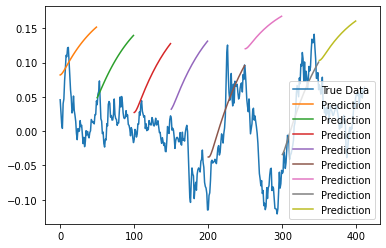

In [5]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [6]:
int((len(X_test)/50))

8